In [1]:
import os
os.chdir("..")
print("Current Directory:", os.getcwd())

Current Directory: d:\workspace\iscat


In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import nd2
import numpy as np
import os
import pandas as pd
import imagej
import scyjava as sj

In [3]:
num='02'
path = f'dataset\\2024_11_11\\Metasurface\\Chip_02\\Metasurface {num}\\Brightfield'
z_stack_path = path+f'\\02_{num}_BF.nd2'
f1_path = path+'\\Captured Cy5.tif'
f2_path = path+'\\Captured FITC.tif'
f3_path = path+'\\Captured TRITC.tif'
f1_results = path+"\\Cy5.csv"
f2_results = path+"\\FITC.csv"
f3_results = path+"\\TRITC.csv"
z_stack_image = nd2.imread(z_stack_path)
f1_img =  Image.open(f1_path)
f2_img =  Image.open(f2_path)
f3_img =  Image.open(f3_path)

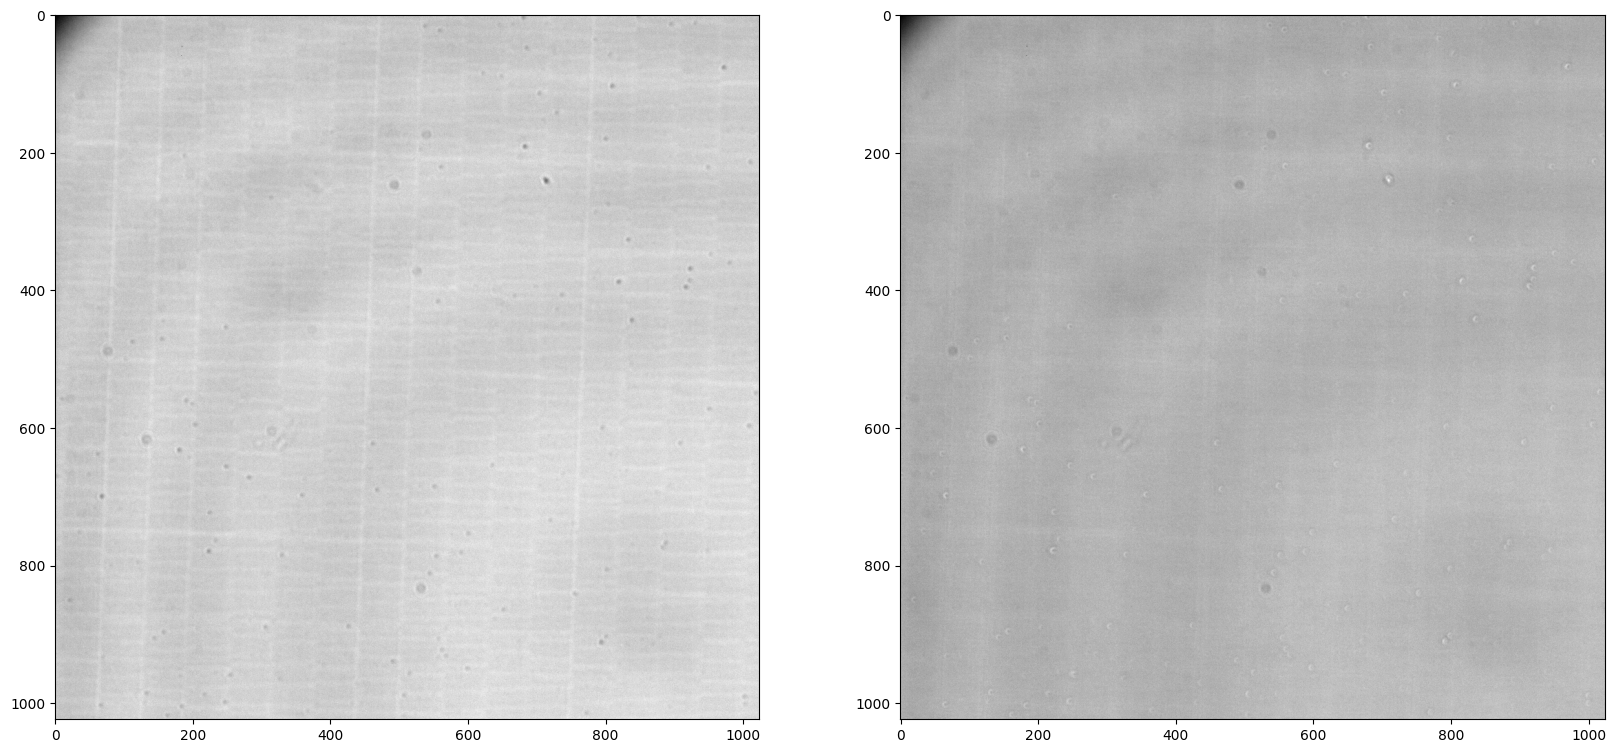

In [4]:
img = z_stack_image[:,:1024,:1024]
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 20))
ax1.imshow(img[0], cmap='gray')
ax2.imshow(img[200], cmap='gray')

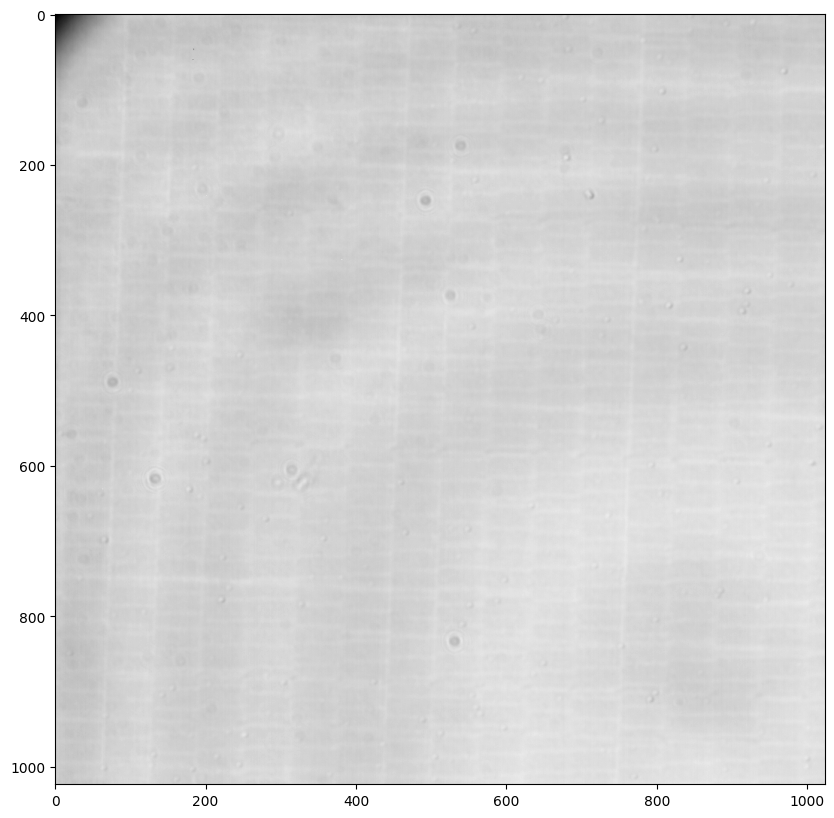

In [5]:
mean = np.mean(z_stack_image, axis=0)
img = mean[:1024,:1024]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(img, cmap='gray')

In [6]:
def compute_mean_slices(z_stack, num_chunks):
    """
    Divides the z_stack into `num_chunks` parts along the z-axis and computes the mean 
    image for each part.

    Parameters:
        z_stack (numpy.ndarray): The input 3D numpy array with shape (200, X, X).
        num_chunks (int): Number of chunks to divide the z-axis into.

    Returns:
        list: A list of numpy arrays, each representing the mean image of a chunk.
    """
    # Ensure the z_stack is a 3D array
    if z_stack.ndim != 3:
        raise ValueError("Input z_stack must be a 3D numpy array.")

    # Get the number of slices along the z-axis
    num_slices = z_stack.shape[0]

    # Compute the size of each chunk
    chunk_size = num_slices // num_chunks

    # Initialize a list to store the mean images
    mean_images = []

    for i in range(num_chunks):
        start_idx = i * chunk_size
        # For the last chunk, include all remaining slices
        end_idx = (i + 1) * chunk_size if i != num_chunks - 1 else num_slices
        
        # Compute the mean along the z-axis for the current chunk
        mean_image = np.mean(z_stack[start_idx:end_idx], axis=0)
        mean_images.append(mean_image)

    return mean_images
z_stack_images = compute_mean_slices(z_stack_image, 3)

In [7]:
z_stack_images[0].astype(np.uint16)

array([[1745, 1669, 1717, ...,  387,  375,  323],
       [1706, 1609, 1691, ...,  404,  384,  341],
       [1703, 1663, 1692, ...,  398,  381,  345],
       ...,
       [7081, 6454, 6458, ...,  494,  487,  431],
       [7373, 6666, 6507, ...,  483,  475,  428],
       [7914, 7327, 7151, ...,  473,  454,  411]], dtype=uint16)

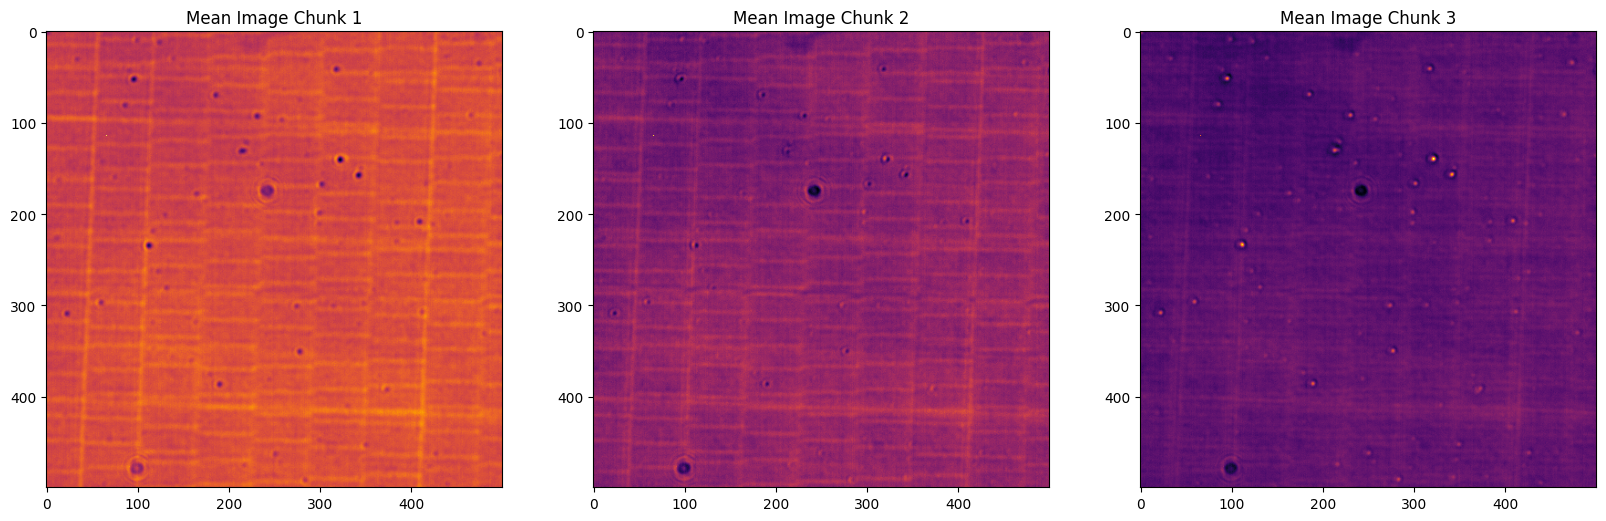

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20, 20))
for i, ax in enumerate(axes):
    ax.imshow(z_stack_images[i][1000:1500,1000:1500].astype(np.uint16), cmap='inferno')
    ax.set_title(f"Mean Image Chunk {i + 1}")

In [9]:
from src.data_processing.dataset import iScatDataset
from src.data_processing.utils import Utils
import torch
DEVICE= 'cuda:11' if torch.cuda.is_available() else 'cpu'
data_path_1 = os.path.join('dataset', '2024_11_11', 'Metasurface', 'Chip_02')
data_path_2 = os.path.join('dataset', '2024_11_12', 'Metasurface', 'Chip_01')
image_paths= []
target_paths=[]
for data_path in [data_path_1,data_path_2]:
    i,t = Utils.get_data_paths(data_path, 'Brightfield',3)
    image_paths.extend(i)
    target_paths.extend(t)

Saved: dataset\2024_11_11\Metasurface\Chip_02\Metasurface 01\Brightfield\frame_0_mean.tiff
Saved: dataset\2024_11_11\Metasurface\Chip_02\Metasurface 01\Brightfield\frame_1_mean.tiff
Saved: dataset\2024_11_11\Metasurface\Chip_02\Metasurface 01\Brightfield\frame_2_mean.tiff
Saved: dataset\2024_11_11\Metasurface\Chip_02\Metasurface 02\Brightfield\frame_0_mean.tiff
Saved: dataset\2024_11_11\Metasurface\Chip_02\Metasurface 02\Brightfield\frame_1_mean.tiff
Saved: dataset\2024_11_11\Metasurface\Chip_02\Metasurface 02\Brightfield\frame_2_mean.tiff
Saved: dataset\2024_11_11\Metasurface\Chip_02\Metasurface 03\Brightfield\frame_0_mean.tiff
Saved: dataset\2024_11_11\Metasurface\Chip_02\Metasurface 03\Brightfield\frame_1_mean.tiff
Saved: dataset\2024_11_11\Metasurface\Chip_02\Metasurface 03\Brightfield\frame_2_mean.tiff
Saved: dataset\2024_11_11\Metasurface\Chip_02\Metasurface 04\Brightfield\frame_0_mean.tiff
Saved: dataset\2024_11_11\Metasurface\Chip_02\Metasurface 04\Brightfield\frame_1_mean.tiff

In [10]:
image_paths

[['dataset\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 01\\Brightfield\\frame_0_mean.tiff',
  'dataset\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 01\\Brightfield\\frame_1_mean.tiff',
  'dataset\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 01\\Brightfield\\frame_2_mean.tiff'],
 ['dataset\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 02\\Brightfield\\frame_0_mean.tiff',
  'dataset\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 02\\Brightfield\\frame_1_mean.tiff',
  'dataset\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 02\\Brightfield\\frame_2_mean.tiff'],
 ['dataset\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 03\\Brightfield\\frame_0_mean.tiff',
  'dataset\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 03\\Brightfield\\frame_1_mean.tiff',
  'dataset\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 03\\Brightfield\\frame_2_mean.tiff'],
 ['dataset\\2024_11_11\\Metasurface\\Chip_02\\Metasurface 04\\Brightfield\\frame_0_mean.tiff',
  'dataset\\2024_11_11\\Metasurface\\Chip_02\\M

In [15]:
from src.models.Unet import UNet
unet = UNet(in_channels=3, num_classes=2, init_features=64)
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp
print(get_n_params(unet))

Using cache found in C:\Users\zakar/.cache\torch\hub\mateuszbuda_brain-segmentation-pytorch_master


31037698
